In [359]:
from essentia.standard import Resample, MonoLoader, MonoWriter
import numpy as np
from scipy.io.wavfile import read as wavread, write as wavwrite
from matplotlib import pyplot as plt
import pyaudio
import wave
from scipy import signal
from scipy.interpolate import interp1d
from numpy.fft import fft

%matplotlib inline

In [360]:
# To begin, let's load in some original speech and define some constants.
FILE_NAME = "4.wav"
FILE_PATH = "Data/wave/{}".format(FILE_NAME)
NFFT = 1024
[fs, speech] = wavread(FILE_PATH)

In [361]:
# Opens the file and plays it via an output audio stream.
def play_audio(file_name):
    wf = wave.open(file_name, 'r')
    p = pyaudio.PyAudio()
    stream = p.open(format=p.get_format_from_width(wf.getsampwidth()),
                    channels=wf.getnchannels(),
                    rate=wf.getframerate(),
                    output=True)

    # play the audio in chunks
    data = wf.readframes(512)
    while data != '':
        stream.write(data)
        data = wf.readframes(512)

    # close everything
    stream.stop_stream()
    stream.close()
    p.terminate()

In [362]:
# Define some simple functions to aid in looking at the time/frequency domains of the speech.
def plot_time_domain(signal, title_keyword):
    plt.plot(signal)
    plt.title("Time Domain of {}".format(title_keyword))
    plt.xlabel("sample [n]")
    plt.ylabel("amplitude")
    plt.show()
    
def plot_spectrogram(signal, fs, title_keyword):
    [S, freqs, bins, _] = plt.specgram(signal, NFFT=NFFT, Fs=fs, window=np.hamming(NFFT), pad_to=NFFT)
    plt.title("Spectrogram of {}".format(title_keyword))
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.show()

def observe_signal(signal, title_keyword, fs=16000):
    plt.subplot(211)
    plot_time_domain(signal, title_keyword)
    plt.subplot(211)
    plot_spectrogram(signal, fs, title_keyword)

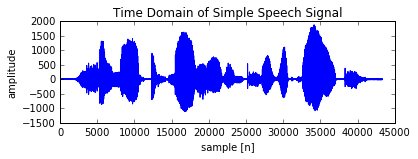

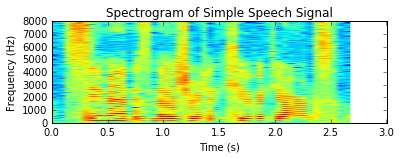

In [363]:
# Take a look at the unaltered speech in the time and frequency domains while it plays.
# Notice the higher frequencies present during fricatives.
observe_signal(speech, "Simple Speech Signal")
play_audio(FILE_PATH)

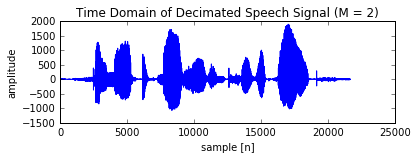

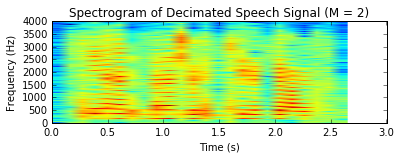

In [364]:
# Now let's decimate the signal and see what happens.
decimation_factor = 2
dec_fs = fs / decimation_factor
decimated_speech = signal.decimate(speech, decimation_factor).astype("int16")

# Take a look at the changes.
observe_signal(decimated_speech, "Decimated Speech Signal (M = {})".format(decimation_factor), fs=dec_fs)

# Save off the audio and play it back.
dec_file_name = "decimated_{}".format(FILE_NAME)
wavwrite(dec_file_name, dec_fs, decimated_speech)
play_audio(dec_file_name)

In [365]:
# Now let's resample the speech to 6.4 kHz, the transmission rate used over the public switched telephone network.
# Among other methods, we can perform this resampling by interpolation by a factor of 2 followed by
# decimation by a factor of 5.
interpolated = signal.resample(speech, len(speech)*2).astype("int16")
phone_speech = signal.decimate(interpolated, 5).astype("int16")
phone_fs = 6400


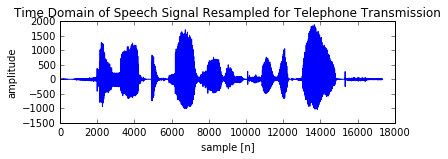

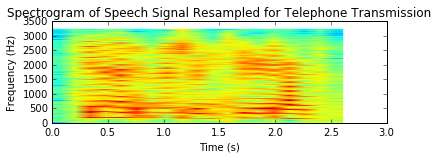

In [366]:
# Observe the changes in the time and frequency domains.
observe_signal(phone_speech, "Speech Signal Resampled for Telephone Transmission", fs=phone_fs)

# Save off the resampled speech and play it back.
new_file_name = "phone_{}".format(FILE_NAME)
wavwrite(new_file_name, phone_fs, phone_speech)
play_audio(new_file_name)

In [367]:
# Observe the difference in samples due to the change in sampling rate, while the duration remains unchanged.
original_duration = len(speech) / fs
resampled_duration = len(phone_speech) / phone_fs
resampled_signal_length = resampled_duration * phone_fs
print "Original Speech: {}s, {} samples @ {} Hz".format(original_duration, len(speech), fs)
print "Resampled Speech: {}s, {} samples @ {} Hz".format(resampled_duration, len(phone_speech), phone_fs)

Original Speech: 2s, 43316 samples @ 16000 Hz
Resampled Speech: 2s, 17327 samples @ 6400 Hz
